# **High-Frequency Quasi-Periodic Oscillations in the Solar Corona Observed with High-Frame-Rate Imaging During the 2023 Total Solar Eclipse**
### **Data Processing and Analysis Notebook**

**Authors**: [Yu Liang]
**Affiliation**: [Shanghai Astronomical Observatory, Chinese Academy of Sciences, Shanghai 200030, China]  
**Contact**: [yuliang@shao.ac.cn]  
**Last Updated**: [2024-12-10]  

---

### **Notebook Overview**

These Jupyter Notebook documents the processing and analysis of observational data collected during the 2023 total solar eclipse. The primary objectives of this Notebook include:

1. Preprocessing of raw white-light corona imaging data (dark field subtraction, flat field correction, and temporal registration).
2. Application of wavelet analysis to detect high-frequency quasi-periodic oscillations (HFQPOs).
3. Visualizations of the solar corona and statistical results for Sun-as-a-star analysis.

---

### **Dependencies**

The analysis relies on the following Python libraries (compatible versions):  
- `numpy==1.2.43`  
- `pandas==1.5.1`  
- `scikit-image==0.20.0`  
- `matplotlib==3.7.1`  
- `astropy==5.1.1`  
- `opencv-python==4.7.0.72`  
- `Pillow==9.2.0`  


<!-- A complete list of dependencies can be found in the accompanying `requirements.txt`. -->

---

### **Data Source**

- **Observation Site**: Learmonth Airport, Australia  
- **Instrument**: iPhone with 565 nm filter, sampling at 240 fps, frams width * height: 720.0 * 1280.0, image shape:(1280, 720, 3)  
- **Date**: April 20, 2023  

---

### **Main Structure**

- **Section 1**: Data loading and inspection  
- **Section 2**: Preprocessing (dark field, flat field, and registration)  
- **Section 3**: Wavelet analysis and signal detection  
- **Section 4**: Results visualization and discussion  

---
### **Notebook 2.0**
#### Dark and flat processing 
- input: *.jpg
- output: *.fits

STEP 1: load data.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from astropy.io import fits
import skimage.io as io 
import struct
from PIL import Image

In [21]:
path0 = '/Volumes/WD1T/share/TSE2023/'                                      # Parent folder
pathmc = '/Volumes/WD1T/share/TSE2023/iPhone/raw/'                          # input dir of the cut moive of the original data, to aviod the 

# output path for flat
dir1  = path0 + 'iPhone/result/m2picflat/'  # path of flat
if not os.path.exists(dir1):
    os.makedirs(dir1)
    
# output path for dark 
dir2  = path0 + 'iPhone/result/m2picdark/'  # path of dark
if not os.path.exists(dir2):
    os.makedirs(dir2)
    
pathdatat  = path0 + 'iPhone/result/m2pic/'  # path of the eclipse data
pathd = dir2
pathdf = dir1

In [22]:
import os
import glob

# delete ._* files
files_to_delete = glob.glob(os.path.join(dir1, '._*'))

for file in files_to_delete:
    try:
        os.remove(file)
        print(f"Deleted: {file}")
    except Exception as e:
        print(f"Error deleting {file}: {e}")
        
        
# delete ._* files
files_to_delete = glob.glob(os.path.join(dir2, '._*'))

for file in files_to_delete:
    try:
        os.remove(file)
        print(f"Deleted: {file}")
    except Exception as e:
        print(f"Error deleting {file}: {e}")
        
        
# delete ._* files
files_to_delete = glob.glob(os.path.join(pathdatat, '._*'))

for file in files_to_delete:
    try:
        os.remove(file)
        print(f"Deleted: {file}")
    except Exception as e:
        print(f"Error deleting {file}: {e}")

In [23]:
dirfdd  = path0 + 'iPhone/result/dfdatat/'  # output path
if not os.path.exists(dirfdd):
    os.makedirs(dirfdd)

In [24]:
##  Step 1. mean of dark
#1.0 load data list
listd = os.listdir(pathd)
listd.sort()
print(listd)
file_bmps = [i for i in listd if i.split(".")[-1] == "jpg"]
fnn = len(file_bmps)   #fnn: file name number
fnnh = fnn      #fnnh: file name number half

['image_00001.jpg', 'image_00002.jpg', 'image_00003.jpg', 'image_00004.jpg', 'image_00005.jpg', 'image_00006.jpg', 'image_00007.jpg', 'image_00008.jpg', 'image_00009.jpg', 'image_00010.jpg', 'image_00011.jpg', 'image_00012.jpg', 'image_00013.jpg', 'image_00014.jpg', 'image_00015.jpg', 'image_00016.jpg', 'image_00017.jpg', 'image_00018.jpg', 'image_00019.jpg', 'image_00020.jpg', 'image_00021.jpg', 'image_00022.jpg', 'image_00023.jpg', 'image_00024.jpg', 'image_00025.jpg', 'image_00026.jpg', 'image_00027.jpg', 'image_00028.jpg', 'image_00029.jpg', 'image_00030.jpg', 'image_00031.jpg', 'image_00032.jpg', 'image_00033.jpg', 'image_00034.jpg', 'image_00035.jpg', 'image_00036.jpg', 'image_00037.jpg', 'image_00038.jpg', 'image_00039.jpg', 'image_00040.jpg', 'image_00041.jpg', 'image_00042.jpg', 'image_00043.jpg', 'image_00044.jpg', 'image_00045.jpg', 'image_00046.jpg', 'image_00047.jpg', 'image_00048.jpg', 'image_00049.jpg', 'image_00050.jpg', 'image_00051.jpg', 'image_00052.jpg', 'image_0005

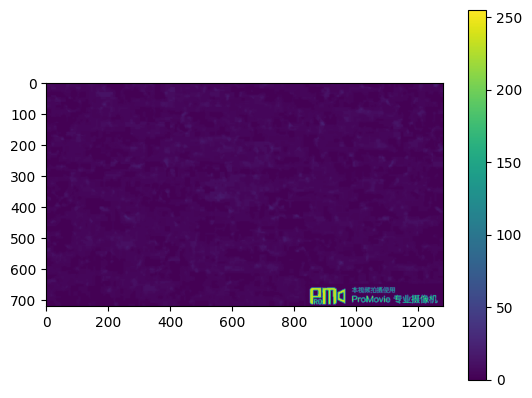

720 1280


In [25]:
img0 = Image.open(pathd  + listd[0])
img = np.array(img0)

img0s = img[:,:,0] + img[:,:,1] + img[:,:,2]
plt.imshow(img0s)
plt.colorbar()
plt.show()

img0s.shape
img0s.dtype
md, nd = img0s.shape
print(md, nd)

---
### **Notebook 2.0**
#### Dark and flat processing 
STEP 2: mean of the dark data

file loaded: image_00001.jpg
file loaded: image_00002.jpg
file loaded: image_00003.jpg
file loaded: image_00004.jpg
file loaded: image_00005.jpg
file loaded: image_00006.jpg
file loaded: image_00007.jpg
file loaded: image_00008.jpg
file loaded: image_00009.jpg
file loaded: image_00010.jpg
file loaded: image_00011.jpg
file loaded: image_00012.jpg
file loaded: image_00013.jpg
file loaded: image_00014.jpg
file loaded: image_00015.jpg
file loaded: image_00016.jpg
file loaded: image_00017.jpg
file loaded: image_00018.jpg
file loaded: image_00019.jpg
file loaded: image_00020.jpg
file loaded: image_00021.jpg
file loaded: image_00022.jpg
file loaded: image_00023.jpg
file loaded: image_00024.jpg
file loaded: image_00025.jpg
file loaded: image_00026.jpg
file loaded: image_00027.jpg
file loaded: image_00028.jpg
file loaded: image_00029.jpg
file loaded: image_00030.jpg
file loaded: image_00031.jpg
file loaded: image_00032.jpg
file loaded: image_00033.jpg
file loaded: image_00034.jpg
file loaded: i

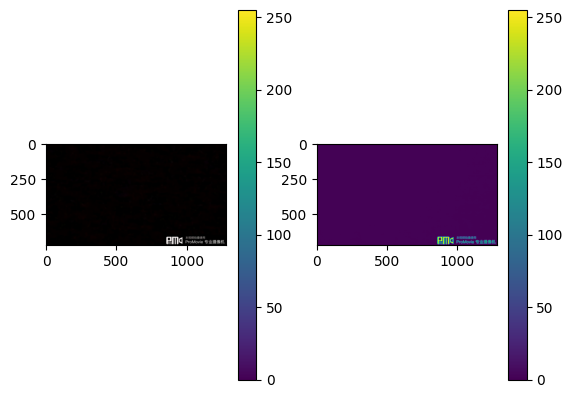

In [26]:
mdark = np.zeros([md, nd])    
for i in range(fnnh):
    print('file loaded:', listd[i])
    img0 = Image.open(pathd + listd[i])
    img = np.array(img0)
    img0s = img[:,:,0]/3 + img[:,:,1]/3 + img[:,:,2]/3
    mdark = mdark + img0s

mdark = mdark/fnnh
img0 = Image.open(pathd  + listd[0])
img = np.array(img0)
plt.subplot(121)
plt.imshow(img)
plt.colorbar()
plt.subplot(122)
plt.imshow(mdark)
plt.colorbar()
plt.show()

---
### **Notebook 2.0**
#### Dark and flat processing 
STEP 3: mean of flat dark

In [27]:
listd = os.listdir(pathdf)
listd.sort()

In [28]:
# flat mean
listdf= os.listdir(pathdf)
listdf.sort()

print(listdf)
file_bmps = [i for i in listd if i.split(".")[-1] == "jpg"]
fnn = len(file_bmps)   #fnn: file name number
fnnh = fnn      #fnnh: file name number half
print(fnn,fnnh)

['image_00001.jpg', 'image_00002.jpg', 'image_00003.jpg', 'image_00004.jpg', 'image_00005.jpg', 'image_00006.jpg', 'image_00007.jpg', 'image_00008.jpg', 'image_00009.jpg', 'image_00010.jpg', 'image_00011.jpg', 'image_00012.jpg', 'image_00013.jpg', 'image_00014.jpg', 'image_00015.jpg', 'image_00016.jpg', 'image_00017.jpg', 'image_00018.jpg', 'image_00019.jpg', 'image_00020.jpg', 'image_00021.jpg', 'image_00022.jpg', 'image_00023.jpg', 'image_00024.jpg', 'image_00025.jpg', 'image_00026.jpg', 'image_00027.jpg', 'image_00028.jpg', 'image_00029.jpg', 'image_00030.jpg', 'image_00031.jpg', 'image_00032.jpg', 'image_00033.jpg', 'image_00034.jpg', 'image_00035.jpg', 'image_00036.jpg', 'image_00037.jpg', 'image_00038.jpg', 'image_00039.jpg', 'image_00040.jpg', 'image_00041.jpg', 'image_00042.jpg', 'image_00043.jpg', 'image_00044.jpg', 'image_00045.jpg', 'image_00046.jpg', 'image_00047.jpg', 'image_00048.jpg', 'image_00049.jpg', 'image_00050.jpg', 'image_00051.jpg', 'image_00052.jpg', 'image_0005

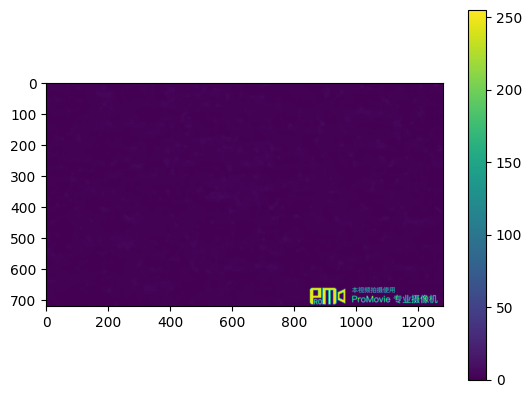

720 1280
file loaded: image_00001.jpg
file loaded: image_00002.jpg
file loaded: image_00003.jpg
file loaded: image_00004.jpg
file loaded: image_00005.jpg
file loaded: image_00006.jpg
file loaded: image_00007.jpg
file loaded: image_00008.jpg
file loaded: image_00009.jpg
file loaded: image_00010.jpg
file loaded: image_00011.jpg
file loaded: image_00012.jpg
file loaded: image_00013.jpg
file loaded: image_00014.jpg
file loaded: image_00015.jpg
file loaded: image_00016.jpg
file loaded: image_00017.jpg
file loaded: image_00018.jpg
file loaded: image_00019.jpg
file loaded: image_00020.jpg
file loaded: image_00021.jpg
file loaded: image_00022.jpg
file loaded: image_00023.jpg
file loaded: image_00024.jpg
file loaded: image_00025.jpg
file loaded: image_00026.jpg
file loaded: image_00027.jpg
file loaded: image_00028.jpg
file loaded: image_00029.jpg
file loaded: image_00030.jpg
file loaded: image_00031.jpg
file loaded: image_00032.jpg
file loaded: image_00033.jpg
file loaded: image_00034.jpg
file 

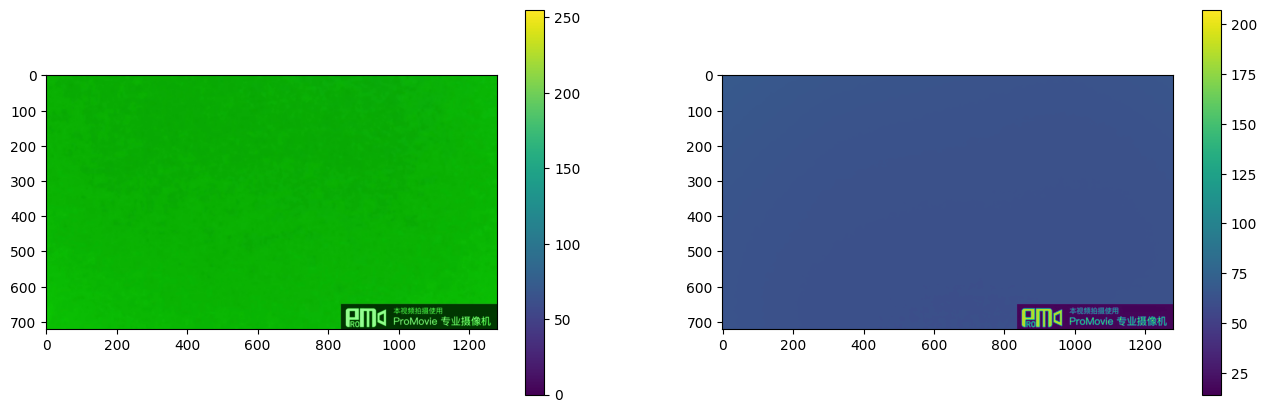

In [29]:
#  mean of flat
img0s = img[:,:,0]/3 + img[:,:,1]/3 + img[:,:,2]/3
plt.imshow(img0s)
plt.colorbar()
plt.show()

img0s.shape
img0s.dtype
mfd, nfd = img0s.shape
print(mfd, nfd)

# 1.2 mean of the dark data
mflat= np.zeros([mfd, nfd])    
for i in range(fnnh):
    print('file loaded:', listdf[i])
    img0 = Image.open(pathdf + listdf[i])
    img = np.array(img0)
    img0s = img[:,:,0]/3 + img[:,:,1]/3 + img[:,:,2]/3
    mflat = mflat + img0s
mflat = mflat/fnnh

plt.figure(figsize = (16,5))
plt.subplot(121)
plt.imshow(img)
plt.colorbar()
plt.subplot(122)
plt.imshow(mflat)
plt.colorbar()
plt.show()

In [30]:
print(np.mean(mflat))

62.03850441788628


In [31]:
listt = os.listdir(pathdatat)
listt.sort()
print(len(listt), listt)
st = 0

13301 ['image_00000.jpg', 'image_00001.jpg', 'image_00002.jpg', 'image_00003.jpg', 'image_00004.jpg', 'image_00005.jpg', 'image_00006.jpg', 'image_00007.jpg', 'image_00008.jpg', 'image_00009.jpg', 'image_00010.jpg', 'image_00011.jpg', 'image_00012.jpg', 'image_00013.jpg', 'image_00014.jpg', 'image_00015.jpg', 'image_00016.jpg', 'image_00017.jpg', 'image_00018.jpg', 'image_00019.jpg', 'image_00020.jpg', 'image_00021.jpg', 'image_00022.jpg', 'image_00023.jpg', 'image_00024.jpg', 'image_00025.jpg', 'image_00026.jpg', 'image_00027.jpg', 'image_00028.jpg', 'image_00029.jpg', 'image_00030.jpg', 'image_00031.jpg', 'image_00032.jpg', 'image_00033.jpg', 'image_00034.jpg', 'image_00035.jpg', 'image_00036.jpg', 'image_00037.jpg', 'image_00038.jpg', 'image_00039.jpg', 'image_00040.jpg', 'image_00041.jpg', 'image_00042.jpg', 'image_00043.jpg', 'image_00044.jpg', 'image_00045.jpg', 'image_00046.jpg', 'image_00047.jpg', 'image_00048.jpg', 'image_00049.jpg', 'image_00050.jpg', 'image_00051.jpg', 'imag

---
### **Notebook 2.0**
#### Dark and flat processing 
STEP 4:  data dark processing

['image_00000.jpg', 'image_00001.jpg', 'image_00002.jpg', 'image_00003.jpg', 'image_00004.jpg', 'image_00005.jpg', 'image_00006.jpg', 'image_00007.jpg', 'image_00008.jpg', 'image_00009.jpg', 'image_00010.jpg', 'image_00011.jpg', 'image_00012.jpg', 'image_00013.jpg', 'image_00014.jpg', 'image_00015.jpg', 'image_00016.jpg', 'image_00017.jpg', 'image_00018.jpg', 'image_00019.jpg', 'image_00020.jpg', 'image_00021.jpg', 'image_00022.jpg', 'image_00023.jpg', 'image_00024.jpg', 'image_00025.jpg', 'image_00026.jpg', 'image_00027.jpg', 'image_00028.jpg', 'image_00029.jpg', 'image_00030.jpg', 'image_00031.jpg', 'image_00032.jpg', 'image_00033.jpg', 'image_00034.jpg', 'image_00035.jpg', 'image_00036.jpg', 'image_00037.jpg', 'image_00038.jpg', 'image_00039.jpg', 'image_00040.jpg', 'image_00041.jpg', 'image_00042.jpg', 'image_00043.jpg', 'image_00044.jpg', 'image_00045.jpg', 'image_00046.jpg', 'image_00047.jpg', 'image_00048.jpg', 'image_00049.jpg', 'image_00050.jpg', 'image_00051.jpg', 'image_0005

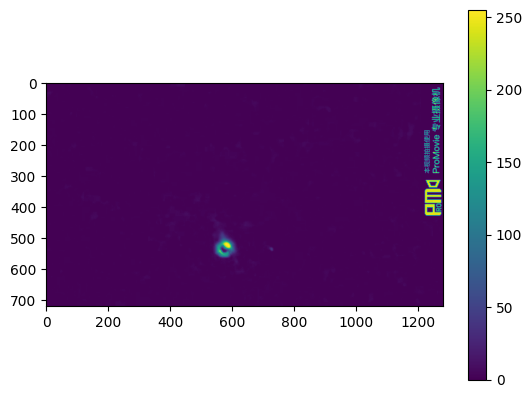

720 1280


In [32]:

listdatan = os.listdir(pathdatat)
listdatan.sort()

print(listdatan)
file_bmps = [i for i in listdatan if i.split(".")[-1] == "jpg"]
fnn = len(file_bmps)   #fnn: file name number
fnnh = fnn - st
print(fnn,fnnh)


# data totally load and shown
img0 = Image.open(pathdatat  + listdatan[st +  0])
img = np.array(img0)
img0s = img[:,:,0] #+ img[:,:,1] + img[:,:,2]
plt.imshow(img0s)
plt.colorbar()
plt.show()

img0s.shape
img0s.dtype
mfd, nfd = img0s.shape
print(mfd, nfd)

In [33]:
print(st, pathdatat + listdatan[6000])
img.shape

0 /Volumes/WD1T/share/TSE2023/iPhone/result/m2pic/image_06000.jpg


(720, 1280, 3)

In [34]:
mdflat = mflat - mdark
mmdflat = np.mean(mdflat)

img0 = Image.open(pathdatat + listdatan[6000])
img = np.array(img0)

print(st, pathdatat + listdatan[6000])
img = np.array(img)
img0s = img[:,:,0]/3 + img[:,:,1]/3 + img[:,:,2]/3
img1  = img0s - mdark 
#img1[np.where(img1 < 0)] = 0
img2 = img1 / mdflat
img3 = img2 * mmdflat

print(np.mean(mdark), np.mean(mflat), np.mean(mdflat), np.mean(img3))
print(img0s.dtype, img1.dtype,img2.dtype,img3.dtype)

# plt.subplot(221)
# plt.imshow(img0s)
# plt.colorbar()
# plt.subplot(222)
# plt.imshow(img1)
# plt.colorbar()
# plt.subplot(223)
# plt.imshow(img2[sr: er, sc: ec],vmin = 0, vmax = 50)
# plt.colorbar()
# plt.subplot(224)
# plt.imshow(img3,vmin = 0, vmax = 255)
# plt.colorbar()
# plt.show()

0 /Volumes/WD1T/share/TSE2023/iPhone/result/m2pic/image_06000.jpg
2.7630620505318877 62.03850441788628 59.275442367354366 4.754906871007173
float64 float64 float64 float64


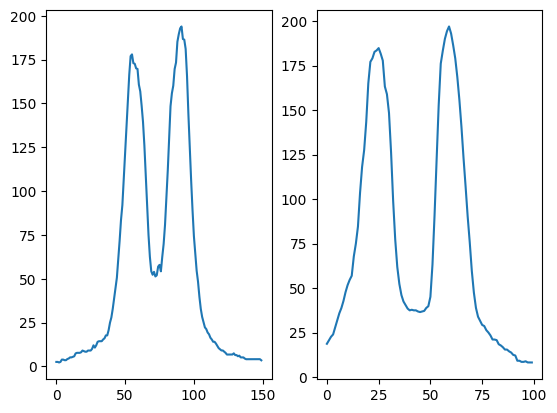

In [35]:
ln = 535
cn = 570
plt.subplot(121)
plt.plot(img3[ln,500:650])
plt.subplot(122)
plt.plot(img3[500:600,cn])

17 9.470588235294118


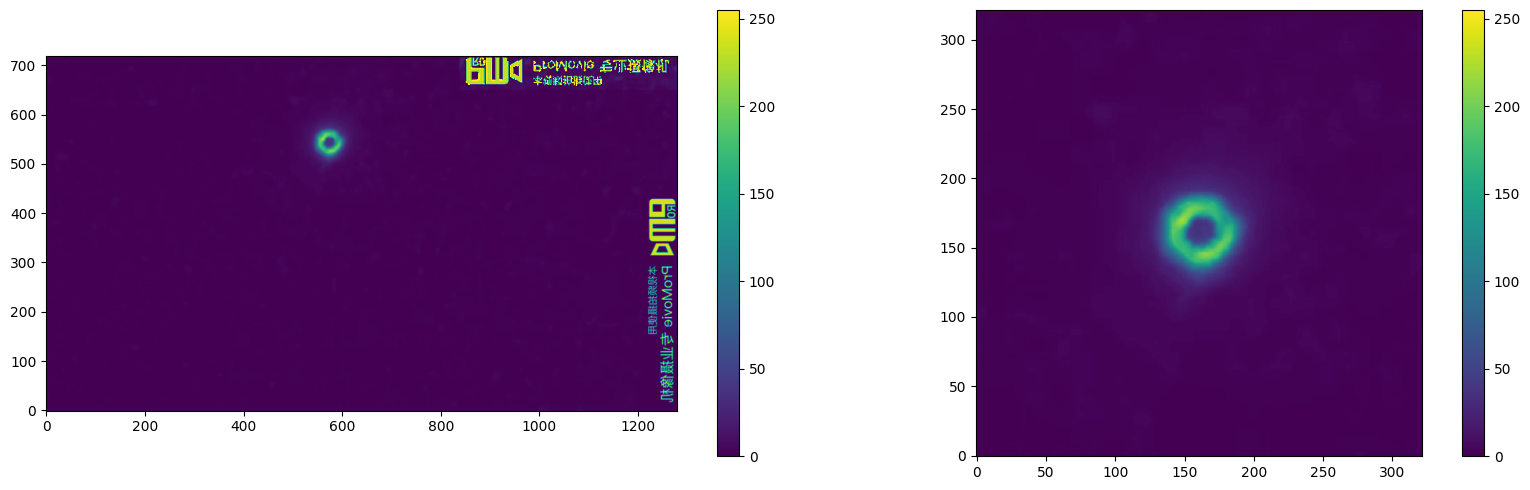

In [36]:
cidx1, cidx2 = np.argmax(img3[ln,500:570]) + 500, np.argmax(img3[ln,570:650]) + 570
ridx1, ridx2 = np.argmax(img3[500:540,cn]) + 500, np.argmax(img3[540:600,cn]) + 540
rc, cc = int((ridx1 + ridx2) /2), int((cidx1 + cidx2) /2)
idxrange = 720 - ridx2
rs = int(((ridx2 - ridx1)/4 + (cidx2 - cidx1)/4 )/1.006)            # rs: radii of the Sun 
crs = idxrange/rs                                                   # crs: corresponding High S/N region selected for further analysis
print(rs, crs)

img4 = img3[rc-idxrange:rc + idxrange, cc-idxrange:cc + idxrange]
roi = [rc, cc, idxrange]
np.save('./output/roi.npy', roi)

plt.figure(figsize = [16,5])
plt.subplot(121)
plt.imshow(img3,vmin = 0, vmax = 255, origin='lower', label='preprocessing coronal image')
plt.colorbar()
plt.subplot(122)
plt.imshow(img4,vmin = 0, vmax = 255, origin='lower', label='High S/N region selected for further analysis')
plt.colorbar()
plt.tight_layout()
plt.show()

file loaded: image_00000.jpg
file loaded: image_00001.jpg
file loaded: image_00002.jpg
file loaded: image_00003.jpg
file loaded: image_00004.jpg
file loaded: image_00005.jpg
file loaded: image_00006.jpg
file loaded: image_00007.jpg
file loaded: image_00008.jpg
file loaded: image_00009.jpg
file loaded: image_00010.jpg
file loaded: image_00011.jpg
file loaded: image_00012.jpg
file loaded: image_00013.jpg
file loaded: image_00014.jpg
file loaded: image_00015.jpg
file loaded: image_00016.jpg
file loaded: image_00017.jpg
file loaded: image_00018.jpg
file loaded: image_00019.jpg
file loaded: image_00020.jpg
file loaded: image_00021.jpg
file loaded: image_00022.jpg
file loaded: image_00023.jpg
file loaded: image_00024.jpg
file loaded: image_00025.jpg
file loaded: image_00026.jpg
file loaded: image_00027.jpg
file loaded: image_00028.jpg
file loaded: image_00029.jpg
file loaded: image_00030.jpg
file loaded: image_00031.jpg
file loaded: image_00032.jpg
file loaded: image_00033.jpg
file loaded: i

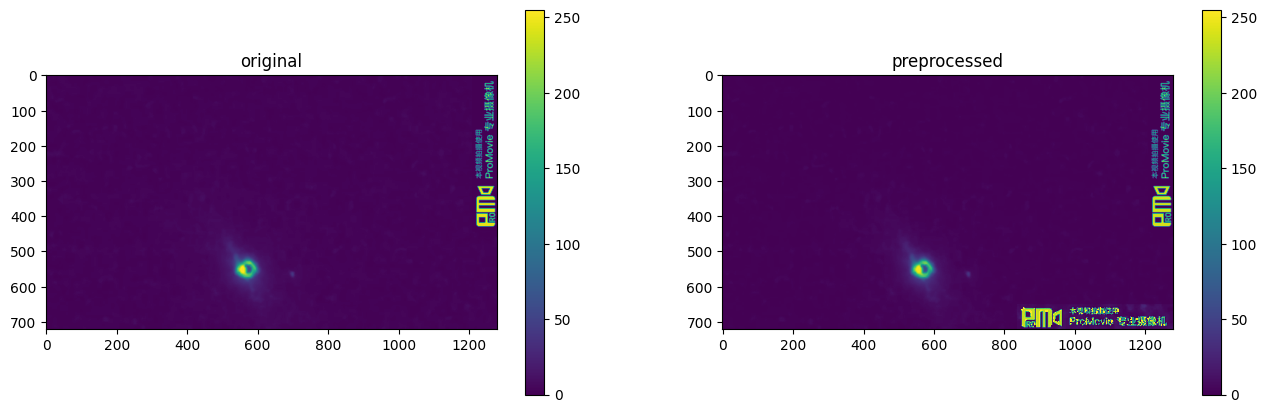

In [37]:
for i in range(fnnh):
    print('file loaded:', listdatan[i + st])
    img0 = Image.open(pathdatat + listdatan[i + st])
    img = np.array(img0)
    img0s = img[:,:,0]/3 + img[:,:,1]/3 + img[:,:,2]/3
    img1 = img0s - mdark
    img2 = img1 / mdflat
    img3 = img2 * mmdflat
    img4 = img3[rc-idxrange:rc + idxrange, cc-idxrange:cc + idxrange]
    img4.astype('float32')
    hdu = fits.PrimaryHDU(data=img4)
    name0 = listdatan[i + st] 
    hdu.writeto(dirfdd + name0[:-4] + '.fits', overwrite=True)  

plt.figure(figsize = (16,5))
plt.subplot(121)
plt.imshow(img0s)
plt.title('original')
plt.colorbar()
plt.subplot(122)
plt.imshow(img3, vmin = 0, vmax = 255)
plt.title('preprocessed')
plt.colorbar()
plt.show()

In [38]:
print('data dark flat preprocessing over, save to fits files')

data dark flat preprocessing over, save to fits files
